<a href="https://colab.research.google.com/github/pedroasacc03/main_projects/blob/main/ProjetoFinal_OCR_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python==4.6.0.66
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jam

In [ ]:
! git clone https://github.com/sthemonica/text-recognize

Cloning into 'text-recognize'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 148 (delta 3), reused 1 (delta 1), pack-reused 144
Receiving objects: 100% (148/148), 37.21 MiB | 21.63 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [ ]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1.1 [856 kB]
Fetched 856 kB in 1s (1,009 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 121972 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


In [ ]:
from pytesseract import Output

In [ ]:
import pytesseract
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
import matplotlib.pyplot as plt
import re

Fazendo a lista de caminhos das imagens na pasta "Projeto"

In [ ]:
projeto = "/content/text-recognize/Imagens/Projeto"
caminho = [os.path.join(projeto,f) for f in os.listdir(projeto)]
print(caminho)

projeto_2 = "/content/text-recognize/Atividades/Aula 5"
caminho_2 = [os.path.join(projeto_2,f) for f in os.listdir(projeto_2)]
print(caminho_2)

['/content/text-recognize/Imagens/Projeto/artigo-desbalanceamento.png', '/content/text-recognize/Imagens/Projeto/artigo-spark.png', '/content/text-recognize/Imagens/Projeto/artigo-termos-ML.png', '/content/text-recognize/Imagens/Projeto/artigo-eng-dados.png']
['/content/text-recognize/Atividades/Aula 5/Aula5-GitHub.png', '/content/text-recognize/Atividades/Aula 5/Aula5-Ambientes_Virtuais.png', '/content/text-recognize/Atividades/Aula 5/Aula5-ROC.png', '/content/text-recognize/Atividades/Aula 5/Aula5-Visao.png', '/content/text-recognize/Atividades/Aula 5/Aula5-Microstrategy.png']


Fazendo a funcao "mostrar" para mostrar a imagem

In [ ]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(20,10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

Iterando pela lista de caminhos das imagens e mostrando as imagens

In [ ]:
for imagem in caminho:
  img = cv2.imread(imagem)
  mostrar(img)

for imagem in caminho_2:
  img = cv2.imread(imagem)
  mostrar(img)

Definindo a funcao para processar as imagens para texto

In [ ]:
config_tesseract = '--tessdata-dir tessdata'

def OCR_processa(img,config_tesseract_temp):
  texto = pytesseract.image_to_string(img, config=config_tesseract_temp, lang='por')
  return texto

In [ ]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2024-07-08 15:25:50--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2024-07-08 15:25:50--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-07-08 15:25:50--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

In [ ]:
texto_completo = ''
nome_txt = 'resultados_opr.txt'

texto_completo_2 = ''
nome_txt_2 = 'resultados_opr_2.txt'

Processando todas as imagens para texto

In [ ]:
for imagem in caminho:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  nome_divisao = '=============\n' + str(nome_imagem)
  texto_completo = texto_completo + nome_divisao + '\n'
  texto = OCR_processa(img, config_tesseract)
  texto_completo = texto_completo + texto

for imagem in caminho_2:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  nome_divisao = '=============\n' + str(nome_imagem)
  texto_completo_2 = texto_completo_2 + nome_divisao + '\n'
  texto = OCR_processa(img, config_tesseract)
  texto_completo_2 = texto_completo_2 + texto

In [ ]:
print(texto_completo)
print('\n')
print(texto_completo_2)

artigo-desbalanceamento.png
Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.

Pode ser uma vantagem utilizar o undersampling para reduzir o armazenamento dos dados e
o tempo de execução de códigos, uma vez que a quantidade de dados será bem menor. Uma
das técnicas mais utilizadas é o Near Miss que diminui aleatoriamente a quantidade de
valores da classe majoritária.

AAlgo muito interessante do Near Miss é que ele utiliza a menor distância média dos K-vizinhos
mais próximos, ou seja, seleciona os valores baseando-se no método KNN (K-nearest
neighbors) para reduzir a perda de informação.

Caso queira saber mais sobre como funciona a técnica Near Miss, você pode checar o artigo
KNN approach to unbalanced data distributions: a case study involving information extraction.

 

Oversampl

Salvando o texto em um arquivo .txt

In [ ]:
arquivo_txt = open(nome_txt,'w+')
arquivo_txt.write(texto_completo + '\n')
arquivo_txt.close()

arquivo_txt = open(nome_txt_2, 'w+')
arquivo_txt.write(texto_completo_2 + '\n')
arquivo_txt.close()

In [ ]:
import os
os.makedirs('images_project', exist_ok=True)

In [ ]:
termo_pesquisa = 'learning'
termo_pesquisa_2 = 'ambiente'

Busca de Ocorrencias

In [ ]:
with open(nome_txt) as f:
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa,f.read())]
with open(nome_txt_2) as f:
  ocorrencias_2 = [i.start() for i in re.finditer(termo_pesquisa_2,f.read())]

In [ ]:
print(ocorrencias)
print('\n')
print(ocorrencias_2)

[1641, 4316, 5534]


[730, 887, 1026, 1108, 1146, 1176, 1235, 1268, 1319, 1375, 1432, 1473, 1515, 2766]


In [ ]:
for imagem in caminho:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  print("=============\n" + str(nome_imagem))

  texto = OCR_processa(img, config_tesseract)

  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa,texto)]

  print("Numero de ocorrencias para o termo: {}: {}". format(termo_pesquisa, len(ocorrencias)))
  print('\n')

for imagem in caminho_2:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  print("=============\n" + str(nome_imagem))

  texto_2 = OCR_processa(img, config_tesseract)

  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa_2,texto_2)]

  print("Numero de ocorrencias para o termo: {}: {}". format(termo_pesquisa_2, len(ocorrencias_2)))
  print('\n')



artigo-desbalanceamento.png
Numero de ocorrencias para o termo: learning: 1


artigo-spark.png
Numero de ocorrencias para o termo: learning: 1


artigo-termos-ML.png
Numero de ocorrencias para o termo: learning: 1


artigo-eng-dados.png
Numero de ocorrencias para o termo: learning: 0


Aula5-GitHub.png
Numero de ocorrencias para o termo: ambiente: 14


Aula5-Ambientes_Virtuais.png
Numero de ocorrencias para o termo: ambiente: 14


Aula5-ROC.png
Numero de ocorrencias para o termo: ambiente: 14


Aula5-Visao.png
Numero de ocorrencias para o termo: ambiente: 14


Aula5-Microstrategy.png
Numero de ocorrencias para o termo: ambiente: 14




In [ ]:
from PIL import ImageFont, ImageDraw, Image
fonte_dir = '/content/text-recognize/Imagens/calibri.ttf'

In [ ]:
def escreve_texto(texto,x,y,img, fonte_dir, tamanho=16, cor=(50,50,255)):
  fonte = ImageFont.truetype(fonte_dir, tamanho)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x,y-tamanho),texto, font = fonte, fill = cor)
  img = np.array(img_pil)
  return img

In [ ]:
min_confid = 30 #@param {type: 'slider', min: 0, max: 100}

In [ ]:
def caixa_texto(i, resultado, img, cor=(255,100,0)):
  x=resultado['left'][i]
  y=resultado['top'][i]
  w=resultado['width'][i]
  h=resultado['height'][i]

  cv2.rectangle(img, (x,y), (x+w,y+h), cor, 2)

  return x,y,img

In [ ]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
  resultado = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT)
  num_ocorrencias = 0
  for i in range(0, len(resultado['text'])):
    con = int(resultado['conf'][i])
    if con > min_confid:
      texto = resultado['text'][i]
      if termo_pesquisa in texto.lower():
        x,y,img=caixa_texto(i, resultado, img, (0,0,255))
        img = escreve_texto(texto,x,y,img, fonte_dir, 14, (50,50,255))
        num_ocorrencias += 1
  return img, num_ocorrencias



Reconhecimento na Imagem

artigo-desbalanceamento.png
Numero de ocorrencias para learning em artigo-desbalanceamento.png: 1




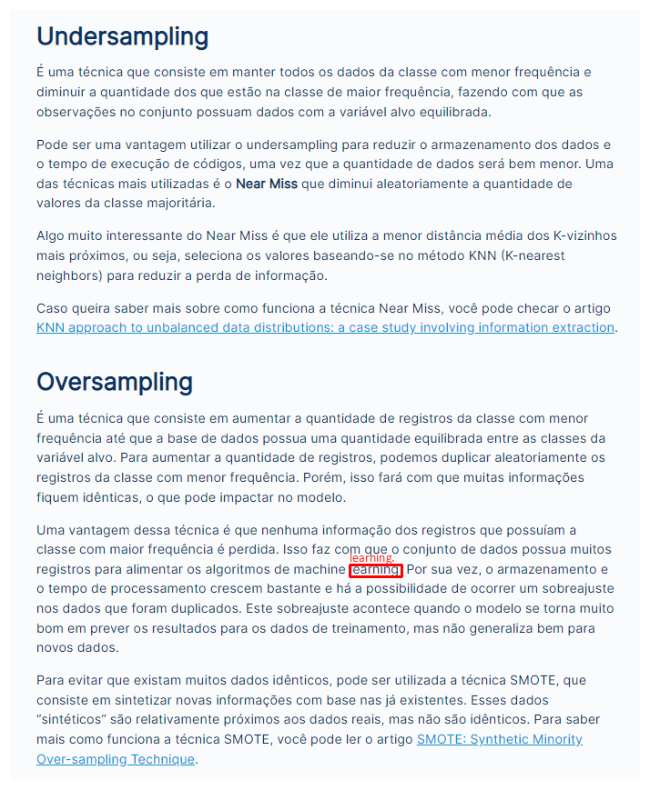

artigo-spark.png
Numero de ocorrencias para learning em artigo-spark.png: 1




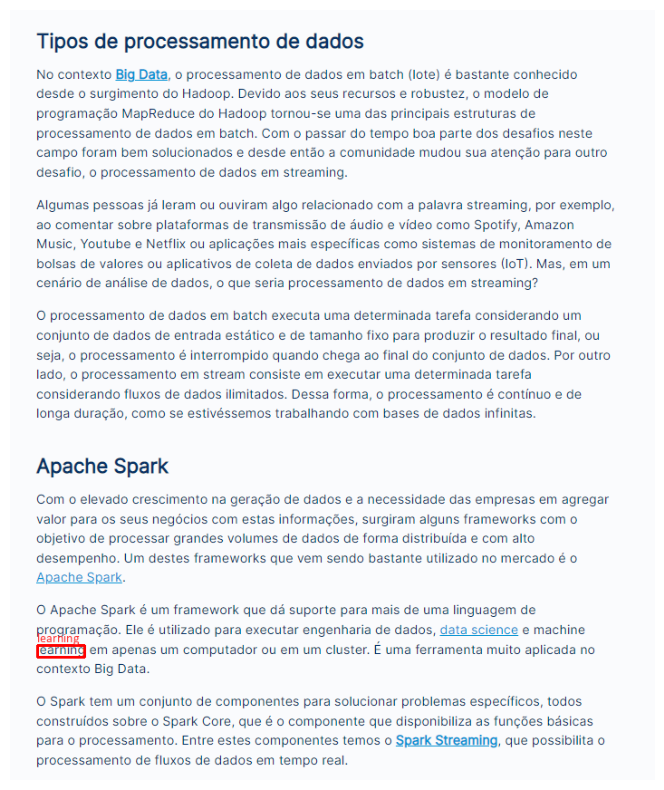

artigo-termos-ML.png
Numero de ocorrencias para learning em artigo-termos-ML.png: 3




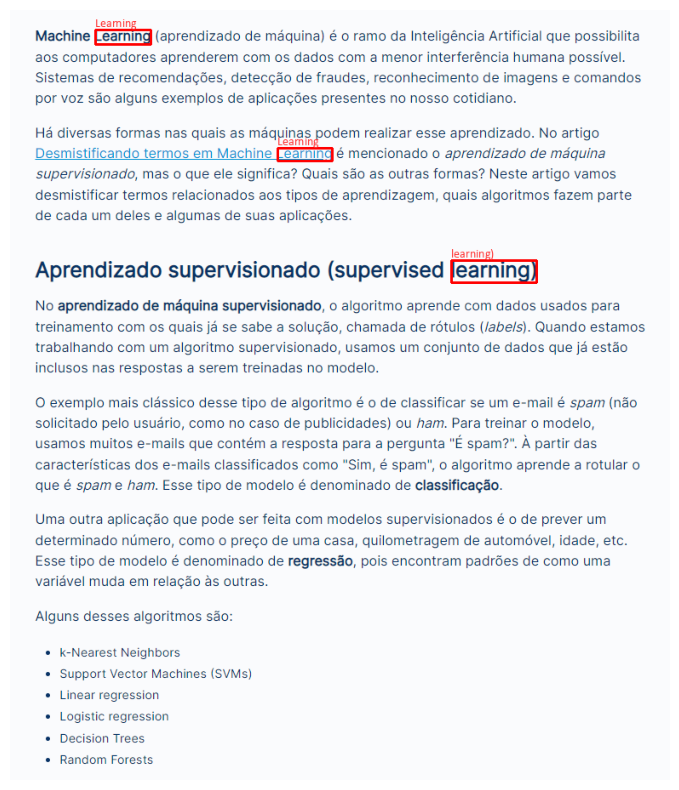

artigo-eng-dados.png
Numero de ocorrencias para learning em artigo-eng-dados.png: 0




In [ ]:
for imagem in caminho:
  img = cv2.imread(imagem)
  img_original = img.copy()
  nome_imagem = os.path.split(imagem)[-1]
  print("===================\n" + str(nome_imagem))
  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_confid)
  print('Numero de ocorrencias para {} em {}: {}'.format(termo_pesquisa, nome_imagem, numero_ocorrencias))
  print('\n')

  if numero_ocorrencias > 0:
    mostrar (img)
    novo_nome_imagem = 'OCR_' + nome_imagem
    nova_imagem = 'images_project/' + str(novo_nome_imagem)
    cv2.imwrite(nova_imagem, img)